# Analysis of the City Dataset

We will explore some concepts of statistical bootstrapping with basic examples.

In [16]:
using Bootstrap

## City Dataset

Let's have a look at the 'city' dataset. This measured the population (in thousands of inhabitants) of major US cities in 1920 (column `U`) and 1930 (column `X`).

In [9]:
using RDatasets

In [13]:
city = dataset("boot", "city")

,U,X
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75
6,37,63
7,29,50
8,23,48
9,30,111
10,2,50


We want to estimate the relative change of the population. An obvious approach for this is to compute the ratios of the average population between the two time points.

In [23]:
city_ratio(df::DataFrame) = mean(df[:,:X]) ./ mean(df[:,:U])

city_ratio (generic function with 1 method)

The point estimate yields a relative change of ~1.5. We will use different bootstrap approaches to compute confidence intervals for the point estimate.

In [24]:
city_ratio(city)

1.5203125

## Bootstrap Estimates of Relative Growth

Here, we will start with three commonly used bootstrapping techniques: The ordinary, the first-order balanced and the exact bootstrap.

In [25]:
bs1 = boot_basic(city, city_ratio, 10000);

In [26]:
bs1

Bootstrap Sampling
  Method:   basic
  Samples:  10000
  t0:       1.5203125
  t1:       [1.83475,2.38989,1.47588,1.85612,1.72234,1.54956,1.68687,1.1471,1.36745,1.38977  …  2.46173,1.37645,1.71465,1.62043,1.65494,1.61468,1.40211,1.51374,1.64808,1.48912]
  Data:     10x2 DataFrame
| Row | U   | X   |
|-----|-----|-----|
| 1   | 138 | 143 |
| 2   | 93  | 104 |
| 3   | 61  | 69  |
| 4   | 179 | 260 |
| 5   | 48  | 75  |
| 6   | 37  | 63  |
| 7   | 29  | 50  |
| 8   | 23  | 48  |
| 9   | 30  | 111 |
| 10  | 2   | 50  |


In [27]:
bs2 = boot_balanced(city, city_ratio, 10000);

In [28]:
bs3 = boot_exact(city, city_ratio);

In [29]:
bs3

Bootstrap Sampling
  Method:   exact
  Samples:  92378
  t0:       1.5203125
  t1:       [1.03623,1.04195,1.04068,1.08867,1.05581,1.05551,1.05193,1.05534,1.09906,1.07476  …  3.85662,4.04918,4.29167,4.60638,5.03125,5.63636,6.56731,8.18421,11.6875,25.0]
  Data:     10x2 DataFrame
| Row | U   | X   |
|-----|-----|-----|
| 1   | 138 | 143 |
| 2   | 93  | 104 |
| 3   | 61  | 69  |
| 4   | 179 | 260 |
| 5   | 48  | 75  |
| 6   | 37  | 63  |
| 7   | 29  | 50  |
| 8   | 23  | 48  |
| 9   | 30  | 111 |
| 10  | 2   | 50  |


Let's compare the bias and the standard error of the bootstrapped estimates:

In [30]:
[bias(bs1), se(bs1)]

2-element Array{Float64,1}:
 0.0392001
 0.224058 

In [31]:
[bias(bs2), se(bs2)]

2-element Array{Float64,1}:
 0.0387687
 0.220133 

In [32]:
[bias(bs3), se(bs3)]

2-element Array{Float64,1}:
 0.0808941
 0.37132  

## Confidence Intervals

For the results from the balanced bootstrap, let's estimate confidence intervals for our point estimate for the relative gain.

In [33]:
ci_basic(bs2)

Bootstrap Confidence Interval
  Method:   basic
  Level:    0.95
  t0:       1.5203125
  Interval: [0.930674,1.79425]


In [34]:
ci_normal(bs2)

Bootstrap Confidence Interval
  Method:   normal
  Level:    0.95
  t0:       1.5203125
  Interval: [1.05009,1.913]


In [35]:
ci_perc(bs2)

Bootstrap Confidence Interval
  Method:   perc
  Level:    0.95
  t0:       1.5203125
  Interval: [1.24638,2.10995]


In [36]:
ci_bca(bs2)

Bootstrap Confidence Interval
  Method:   bca
  Level:    0.95
  t0:       1.5203125
  Interval: [1.23753,2.06207]


## Visualization

In [38]:
using Gadfly

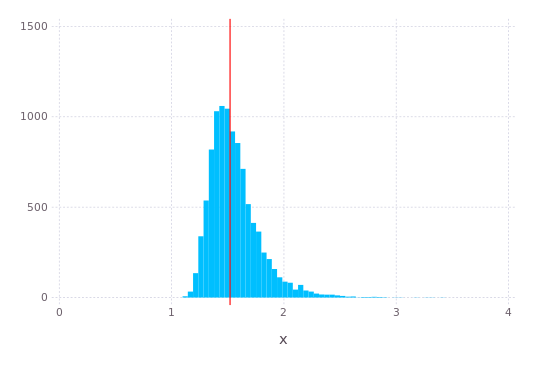

In [39]:
p = plot(
    layer(xintercept = [estimate(bs1)], Geom.vline(color = "red")),
    layer(x = straps(bs1), Geom.histogram(bincount = 50))
    )